# 画所有QTL的SUMMARY 图

In [1]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
plt.rcParams["font.family"]="sans-serif"
plt.rcParams["pdf.fonttype"]= 42

In [2]:
def remove_zero_rows_and_cols(df):
    """
    删除数据框中所有行为0的列和所有列为0的行。

    参数：
    - df：DataFrame，要处理的数据框。

    返回值：
    删除零行零列后的新数据框。
    """
    # 删除所有列为0的行
    df = df.loc[(df != 0).any(axis=1)]

    # 删除所有行为0的列
    df = df.loc[:, (df != 0).any(axis=0)]

    return df

In [3]:
caQTL_SMR_summary_lime = pd.read_csv('/CIMA/Result/downstream/SMR_summary/caQTL_lime_SMR_summary.csv',index_col=0)
eQTL_SMR_summary_lime = pd.read_csv('/CIMA/Result/downstream/SMR_summary/eQTL_lime_SMR_summary.csv',index_col=0)
xQTL_SMR_summary_lime = pd.read_csv('/CIMA/Result/downstream/SMR_summary/xQTL_lime_SMR_summary.csv',index_col=0)

In [4]:
caQTL_SMR_summary_pQTL = pd.read_csv('/CIMA/Result/downstream/SMR_summary/caQTL_pQTL_SMR_summary.csv',index_col=0)
eQTL_SMR_summary_pQTL = pd.read_csv('/CIMA/Result/downstream/SMR_summary/eQTL_pQTL_SMR_summary.csv',index_col=0)
xQTL_SMR_summary_pQTL = pd.read_csv('/CIMA/Result/downstream/SMR_summary/xQTL_pQTL_SMR_summary.csv',index_col=0)

In [5]:
caQTL_SMR_summary_BBJ = pd.read_csv('/CIMA/Result/downstream/SMR_summary/caQTL_BBJ_diease_SMR_summary.csv',index_col=0)
eQTL_SMR_summary_BBJ = pd.read_csv('/CIMA/Result/downstream/SMR_summary/eQTL_BBJ_diease_SMR_summary.csv',index_col=0)
xQTL_SMR_summary_BBJ = pd.read_csv('/CIMA/Result/downstream/SMR_summary/xQTL_BBJ_summary.csv',index_col=0)

In [6]:
caQTL_SMR_summary = pd.concat([caQTL_SMR_summary_lime,caQTL_SMR_summary_pQTL,caQTL_SMR_summary_BBJ],axis=1)
eQTL_SMR_summary = pd.concat([eQTL_SMR_summary_lime,eQTL_SMR_summary_pQTL,eQTL_SMR_summary_BBJ],axis=1)
xQTL_SMR_summary = pd.concat([xQTL_SMR_summary_lime,xQTL_SMR_summary_pQTL,xQTL_SMR_summary_BBJ],axis=1)

In [7]:
caQTL_SMR_summary_1 = remove_zero_rows_and_cols(caQTL_SMR_summary)
eQTL_SMR_summary_1 = remove_zero_rows_and_cols(eQTL_SMR_summary)
xQTL_SMR_summary_1 = remove_zero_rows_and_cols(xQTL_SMR_summary)
# Take the union of indices
union_index = eQTL_SMR_summary_1.index.union(caQTL_SMR_summary_1.index)
union_column = eQTL_SMR_summary_1.columns.union(caQTL_SMR_summary_1.columns)
union_index = union_index.union(xQTL_SMR_summary_1.index)
union_column = union_column.union(xQTL_SMR_summary_1.columns)

In [8]:
union_column = eQTL_SMR_summary.columns[eQTL_SMR_summary.columns.isin(union_column)]

In [9]:
eQTL_all = pd.read_csv('/CIMA/Data/69_celltype_sort.csv',index_col=0)

In [10]:
eQTL_all[~eQTL_all['celltype'].isin(union_index)]

,celltype
55,Plasmablast_MKI67


In [11]:
list1 = np.array(['RA', 'As', 'T2D', 'Urt', 'AD', 'COPD', 'GD', 'CHB', 'AR', 'SLE', 'T1D',
       'Pol', 'UC', 'Pn', 'ChS', 'Hype','stem_Cell_Factor_measurement',
       'TNF_related_apoptosis_inducing_ligand_measurement',
       'urokinase_type_plasminogen_activator_measurement',
       'signaling_lymphocytic_activation_molecule_measurement',
       'C_X_C_motif_chemokine_9_measurement',
       'interleukin_10_receptor_subunit_beta_measurement',
       'protein_S100_A12_measurement', 'cystatin_D_measurement',
       'oncostatin_M_measurement',
       't_cell_surface_glycoprotein_CD5_measurement',
       'level_of_interleukin_12_subunit_beta_in_blood',
       'natural_killer_cell_receptor_2B4_measurement',
       'C_X_C_motif_chemokine_11_measurement',
       'C_X_C_motif_chemokine_10_measurement',
       'level_of_T_cell_differentiation_antigen_CD6_in_blood_plasma',
       'lymphotoxin_alpha_measurement', 'CD40_measurement', 'CCL2_measurement',
       'C_C_motif_chemokine_20_measurement',
       'C_C_motif_chemokine_25_measurement',
       'C_C_motif_chemokine_28_measurement',
       'C_X_C_motif_chemokine_6_measurement',
       'adenosine_deaminase_measurement', 'eotaxin_measurement',
       'fibroblast_growth_factor_19_measurement',
       'fms_related_tyrosine_kinase_3_ligand_measurement',
       'fractalkine_measurement',
       'glial_cell_line_derived_neurotrophic_factor_measurement',
       'interleukin_6_measurement',
       'monocyte_chemotactic_protein_4_measurement',
       'programmed_cell_death_1_ligand_1_measurement',
       'tumor_necrosis_factor_ligand_superfamily_member_12_measurement',
       'vascular_endothelial_growth_factor_A_measurement',
       'C_C_motif_chemokine_4_like_measurement',
       'fibroblast_growth_factor_21_measurement',
       'interleukin_15_receptor_subunit_alpha_measurement',
       'interleukin_17C_measurement',
       'macrophage_inflammatory_protein_1a_measurement',
       'sulfotrasferase_1A1_measurement',
       'tumor_necrosis_factor_receptor_superfamily_member_9_measurement',
       'leukemia_inhibitory_factor_receptor_measurement',
       'matrix_metalloproteinase_1_measurement',
       'delta_and_Notch_like_epidermal_growth_factor_related_receptor_measurement',
       'osteoprotegerin_measurement',
       'TNF_related_activation_induced_cytokine_measurement',
       'beta_nerve_growth_factor_measurement',
       'C_X_C_motif_chemokine_5_measurement','LPC 20:4', 'D-Arabinose', 'Phenylglyoxylic acid',
       '2-HYDROXY-4-(METHYLTHIO)BUTANOATE', '7-Methylguanosine'])

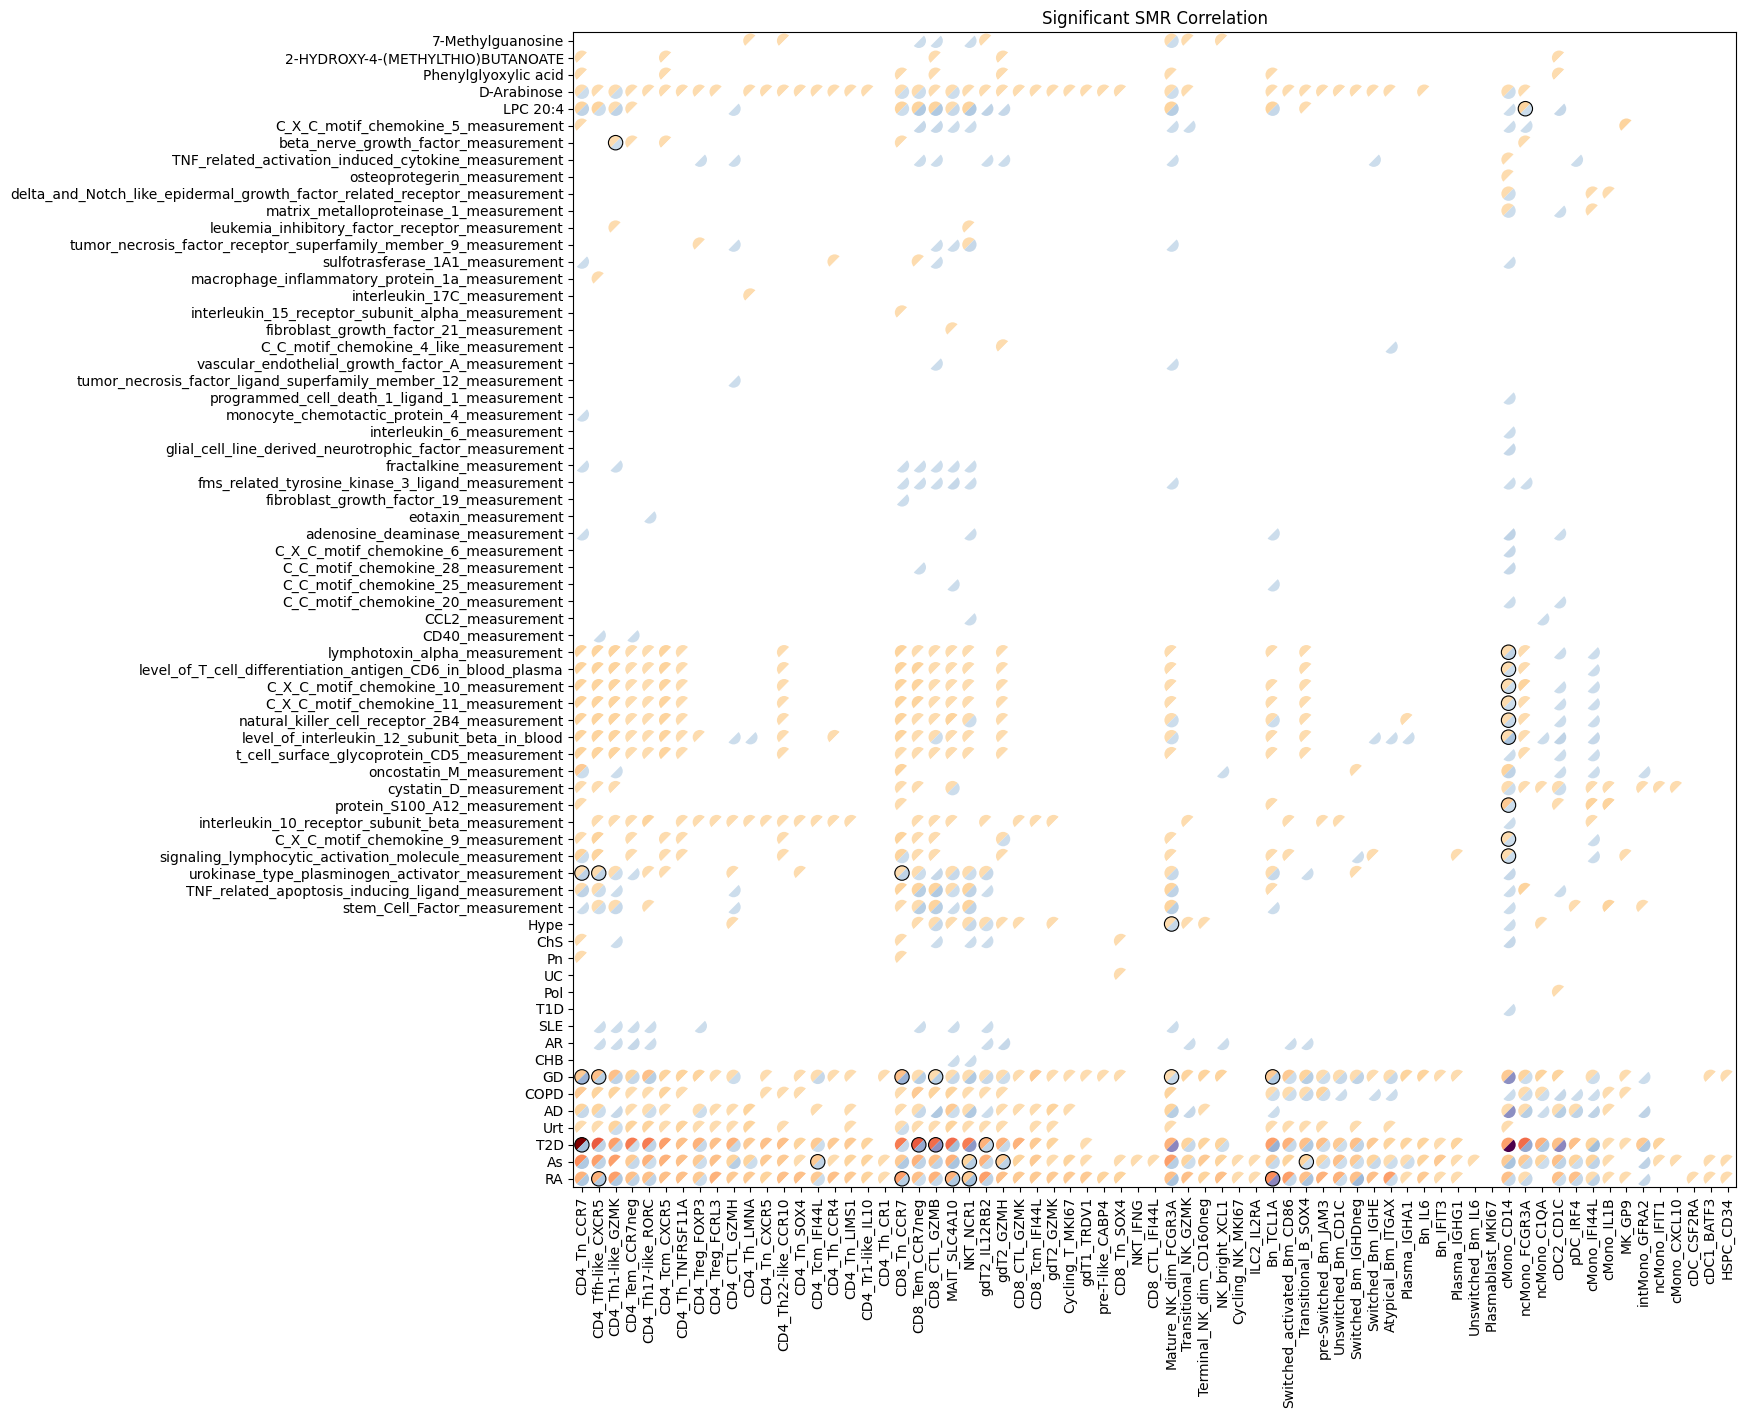

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.patches as patches
from matplotlib.colors import LinearSegmentedColormap

eQTL_df = eQTL_SMR_summary.loc[list(eQTL_all['celltype']),union_column]

caQTL_df = eQTL_df.copy()
caQTL_df.iloc[:, :] = 0

for column in caQTL_SMR_summary_1.columns:
    for rowname in caQTL_SMR_summary_1.index:
        caQTL_df.loc[rowname,column] = caQTL_SMR_summary_1.loc[rowname,column]

#eQTL_df = eQTL_df.iloc[:, ::-1]
#caQTL_df = caQTL_df.iloc[:, ::-1]

eQTL_df = eQTL_df[list1]
caQTL_df = caQTL_df[list1]
# Transpose DataFrames
eQTL_df = eQTL_df.T
caQTL_df = caQTL_df.T

# Define custom color maps
cmap1 = plt.cm.OrRd
cmap2 = plt.cm.BuPu

colors1 = cmap1(np.linspace(0.2, 1, 256))
new_cmap1 = LinearSegmentedColormap.from_list('OrRd_nonwhite', colors1)

colors2 = cmap2(np.linspace(0.2, 1, 256))
new_cmap2 = LinearSegmentedColormap.from_list('BuPu_nonwhite', colors2)

fig, ax = plt.subplots(figsize=(15, 15))

# Normalize data to [0, 1]
norm1 = mcolors.Normalize(vmin=1, vmax=eQTL_df.max().max())
norm2 = mcolors.Normalize(vmin=1, vmax=caQTL_df.max().max())

# Plot each cell with two half-circles
for i, row in enumerate(eQTL_df.index):
    for j, col in enumerate(eQTL_df.columns):
        value1 = eQTL_df.loc[row, col]
        value2 = caQTL_df.loc[row, col]

        # Define the center and radius of the cell
        center = (j + 0.5, i + 0.5)
        radius = 0.425

        # Define and add the two half-circles
        if value1 != 0:
            wedge1 = patches.Wedge(center, radius, 45, 225, facecolor=new_cmap1(norm1(value1)), edgecolor=None)
            ax.add_patch(wedge1)
        else:
            wedge1 = patches.Wedge(center, radius, 45, 225, facecolor='white', edgecolor=None)
            ax.add_patch(wedge1)

        if value2 != 0:
            wedge2 = patches.Wedge(center, radius, 225, 45, facecolor=new_cmap2(norm2(value2)), edgecolor=None)
            ax.add_patch(wedge2)
        else:
            wedge2 = patches.Wedge(center, radius, 225, 45, facecolor='white', edgecolor=None)
            ax.add_patch(wedge2)

# Highlight specific cells with circles
for opera_trait in xQTL_SMR_summary_1.columns:
    for opera_celltype in xQTL_SMR_summary_1.index:
        if xQTL_SMR_summary_1.loc[opera_celltype, opera_trait] > 0:
            r = eQTL_df.index.to_list().index(opera_trait)
            c = eQTL_df.columns.to_list().index(opera_celltype)
            highlight_circle = patches.Circle((c + 0.5, r + 0.5), radius=0.425, linewidth=0.8, edgecolor='black', facecolor='none')
            ax.add_patch(highlight_circle)

# Set labels and title
ax.set_title('Significant SMR Correlation')

# Set axis limits
ax.set_xlim(0, eQTL_df.shape[1])
ax.set_ylim(0, eQTL_df.shape[0])

# Set tick labels
ax.set_xticks(np.arange(eQTL_df.shape[1]) + 0.5)
ax.set_yticks(np.arange(eQTL_df.shape[0]) + 0.5)
ax.set_xticklabels(eQTL_df.columns, rotation=90)
ax.set_yticklabels(eQTL_df.index)

# Create color bars
#cbar1 = plt.colorbar(plt.cm.ScalarMappable(norm=norm1, cmap=new_cmap1), ax=ax, label='SMR_eGene_count')
#cbar2 = plt.colorbar(plt.cm.ScalarMappable(norm=norm2, cmap=new_cmap2), ax=ax, label='SMR_caPeak_count')
plt.savefig('/CIMA/Result/plot/20250305_sfig6_SMR_heatmap_full.pdf', dpi=300, bbox_inches='tight')
plt.show()

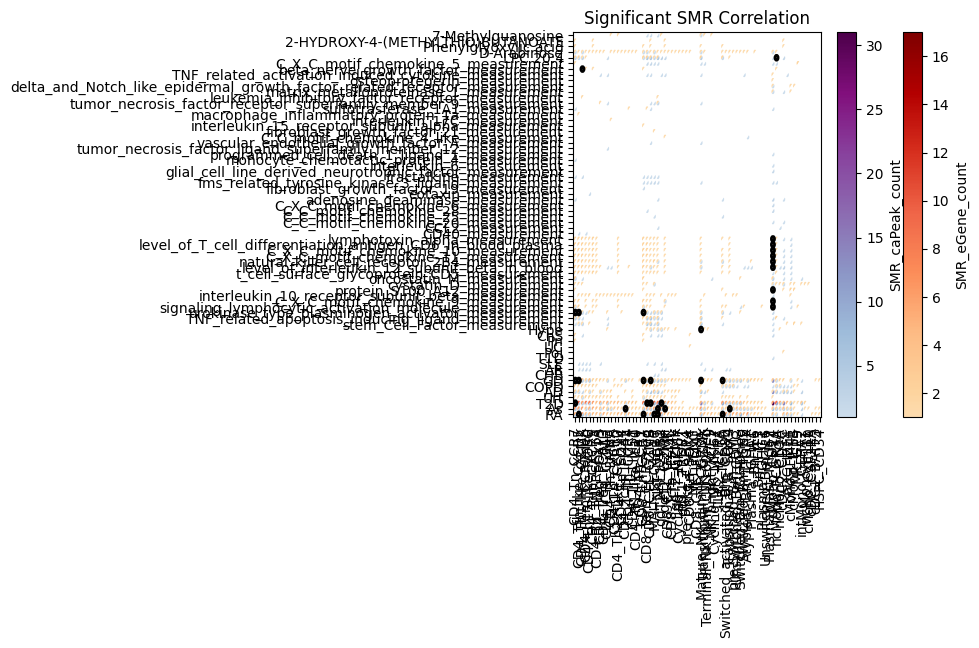

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.patches as patches
from matplotlib.colors import LinearSegmentedColormap

eQTL_df = eQTL_SMR_summary.loc[list(eQTL_all['celltype']),union_column]

caQTL_df = eQTL_df.copy()
caQTL_df.iloc[:, :] = 0

for column in caQTL_SMR_summary_1.columns:
    for rowname in caQTL_SMR_summary_1.index:
        caQTL_df.loc[rowname,column] = caQTL_SMR_summary_1.loc[rowname,column]

#eQTL_df = eQTL_df.iloc[:, ::-1]
#caQTL_df = caQTL_df.iloc[:, ::-1]

eQTL_df = eQTL_df[list1]
caQTL_df = caQTL_df[list1]
# Transpose DataFrames
eQTL_df = eQTL_df.T
caQTL_df = caQTL_df.T

# Define custom color maps
cmap1 = plt.cm.OrRd
cmap2 = plt.cm.BuPu

colors1 = cmap1(np.linspace(0.2, 1, 256))
new_cmap1 = LinearSegmentedColormap.from_list('OrRd_nonwhite', colors1)

colors2 = cmap2(np.linspace(0.2, 1, 256))
new_cmap2 = LinearSegmentedColormap.from_list('BuPu_nonwhite', colors2)

fig, ax = plt.subplots(figsize=(5, 5))

# Normalize data to [0, 1]
norm1 = mcolors.Normalize(vmin=1, vmax=eQTL_df.max().max())
norm2 = mcolors.Normalize(vmin=1, vmax=caQTL_df.max().max())

# Plot each cell with two half-circles
for i, row in enumerate(eQTL_df.index):
    for j, col in enumerate(eQTL_df.columns):
        value1 = eQTL_df.loc[row, col]
        value2 = caQTL_df.loc[row, col]

        # Define the center and radius of the cell
        center = (j + 0.5, i + 0.5)
        radius = 0.425

        # Define and add the two half-circles
        if value1 != 0:
            wedge1 = patches.Wedge(center, radius, 45, 225, facecolor=new_cmap1(norm1(value1)), edgecolor=None)
            ax.add_patch(wedge1)
        else:
            wedge1 = patches.Wedge(center, radius, 45, 225, facecolor='white', edgecolor=None)
            ax.add_patch(wedge1)

        if value2 != 0:
            wedge2 = patches.Wedge(center, radius, 225, 45, facecolor=new_cmap2(norm2(value2)), edgecolor=None)
            ax.add_patch(wedge2)
        else:
            wedge2 = patches.Wedge(center, radius, 225, 45, facecolor='white', edgecolor=None)
            ax.add_patch(wedge2)

# Highlight specific cells with circles
for opera_trait in xQTL_SMR_summary_1.columns:
    for opera_celltype in xQTL_SMR_summary_1.index:
        if xQTL_SMR_summary_1.loc[opera_celltype, opera_trait] > 0:
            r = eQTL_df.index.to_list().index(opera_trait)
            c = eQTL_df.columns.to_list().index(opera_celltype)
            highlight_circle = patches.Circle((c + 0.5, r + 0.5), radius=0.425, linewidth=2, edgecolor='black', facecolor='none')
            ax.add_patch(highlight_circle)

# Set labels and title
ax.set_title('Significant SMR Correlation')

# Set axis limits
ax.set_xlim(0, eQTL_df.shape[1])
ax.set_ylim(0, eQTL_df.shape[0])

# Set tick labels
ax.set_xticks(np.arange(eQTL_df.shape[1]) + 0.5)
ax.set_yticks(np.arange(eQTL_df.shape[0]) + 0.5)
ax.set_xticklabels(eQTL_df.columns, rotation=90)
ax.set_yticklabels(eQTL_df.index)

# Create color bars
cbar1 = plt.colorbar(plt.cm.ScalarMappable(norm=norm1, cmap=new_cmap1), ax=ax, label='SMR_eGene_count')
cbar2 = plt.colorbar(plt.cm.ScalarMappable(norm=norm2, cmap=new_cmap2), ax=ax, label='SMR_caPeak_count')
plt.savefig('/CIMA/Result/plot/20250305_sfig6_SMR_heatmap_full_with_legened.pdf', dpi=300, bbox_inches='tight')
plt.show()